# AQI Predictor - Exploratory Data Analysis

This notebook performs exploratory data analysis on the AQI (Air Quality Index) data from Hopsworks feature store.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hopsworks
import os
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

c:\Users\HP\Documents\STUDY\Data Science\PROJECTS\10Pearls\aqi-predictor\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load environment variables
load_dotenv()
HOPSWORKS_API_KEY = os.getenv("HOPSWORKS_API_KEY")
PROJECT_NAME = os.getenv("PROJECT_NAME")
HOST = os.getenv("HOST")

In [3]:
# Connect to Hopsworks and load data
project = hopsworks.login(
    host=HOST,
    project=PROJECT_NAME,
    api_key_value=HOPSWORKS_API_KEY
)

fs = project.get_feature_store(name='aqi_predictor_lahore_featurestore')
fg = fs.get_feature_group('aqi_features', version=1)

# Read from online store
print("Loading data from Hopsworks...")
df = fg.read(online=True)
print(f"Data loaded successfully! Shape: {df.shape}")

2026-01-24 03:39:34,522 INFO: Initializing external client
2026-01-24 03:39:34,523 INFO: Base URL: https://eu-west.cloud.hopsworks.ai:443
2026-01-24 03:39:36,667 INFO: Python Engine initialized.

Logged in to project, explore it here https://eu-west.cloud.hopsworks.ai:443/p/2197
Loading data from Hopsworks...
Data loaded successfully! Shape: (10, 12)


## 1. Data Overview

In [4]:
# Display first few rows
df.head(10)

,event_id,timestamp,city,aqi,pm25,pm10,no2,so2,o3,hour,day,month
0,Lahore_2026-01-17T22:00:00+00:00,2026-01-17 22:00:00,Lahore,34.0,34.0,0.0,0.0,0.0,0.0,22,17,1
1,Lahore_2026-01-18T22:00:00+00:00,2026-01-18 22:00:00,Lahore,34.0,34.0,0.0,0.0,0.0,0.0,22,18,1
2,Lahore_2026-01-14T22:00:00+00:00,2026-01-14 22:00:00,Lahore,34.0,34.0,0.0,0.0,0.0,0.0,22,14,1
3,Lahore_2026-01-23T22:00:00+00:00,2026-01-23 22:00:00,Lahore,34.0,34.0,0.0,0.0,0.0,0.0,22,23,1
4,Lahore_2026-01-20T22:00:00+00:00,2026-01-20 22:00:00,Lahore,34.0,34.0,0.0,0.0,0.0,0.0,22,20,1
5,Lahore_2026-01-16T22:00:00+00:00,2026-01-16 22:00:00,Lahore,34.0,34.0,0.0,0.0,0.0,0.0,22,16,1
6,Lahore_2026-01-22T22:00:00+00:00,2026-01-22 22:00:00,Lahore,34.0,34.0,0.0,0.0,0.0,0.0,22,22,1
7,Lahore_2026-01-21T22:00:00+00:00,2026-01-21 22:00:00,Lahore,34.0,34.0,0.0,0.0,0.0,0.0,22,21,1
8,Lahore_2026-01-19T22:00:00+00:00,2026-01-19 22:00:00,Lahore,34.0,34.0,0.0,0.0,0.0,0.0,22,19,1
9,Lahore_2026-01-15T22:00:00+00:00,2026-01-15 22:00:00,Lahore,34.0,34.0,0.0,0.0,0.0,0.0,22,15,1


In [5]:
# Basic information about the dataset
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData Types:")
print(df.dtypes)

Dataset Info:
Shape: (10, 12)

Columns: ['event_id', 'timestamp', 'city', 'aqi', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'hour', 'day', 'month']

Data Types:
event_id             object
timestamp    datetime64[ns]
city                 object
aqi                 float64
pm25                float64
pm10                float64
no2                 float64
so2                 float64
o3                  float64
hour                  int64
day                   int64
month                 int64
dtype: object


In [6]:
# Statistical summary
df.describe()

,timestamp,aqi,pm25,pm10,no2,so2,o3,hour,day,month
count,10,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.00000,10.0
mean,2026-01-19 10:00:00,34.0,34.0,0.0,0.0,0.0,0.0,22.0,18.50000,1.0
min,2026-01-14 22:00:00,34.0,34.0,0.0,0.0,0.0,0.0,22.0,14.00000,1.0
25%,2026-01-17 04:00:00,34.0,34.0,0.0,0.0,0.0,0.0,22.0,16.25000,1.0
50%,2026-01-19 10:00:00,34.0,34.0,0.0,0.0,0.0,0.0,22.0,18.50000,1.0
75%,2026-01-21 16:00:00,34.0,34.0,0.0,0.0,0.0,0.0,22.0,20.75000,1.0
max,2026-01-23 22:00:00,34.0,34.0,0.0,0.0,0.0,0.0,22.0,23.00000,1.0
std,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.02765,0.0


## 2. Missing Values Analysis

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Missing Values:")
    print(missing_df)
else:
    print("✅ No missing values found!")

✅ No missing values found!


In [8]:
# Visualize missing values if any
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()

## 3. Target Variable Analysis (AQI)

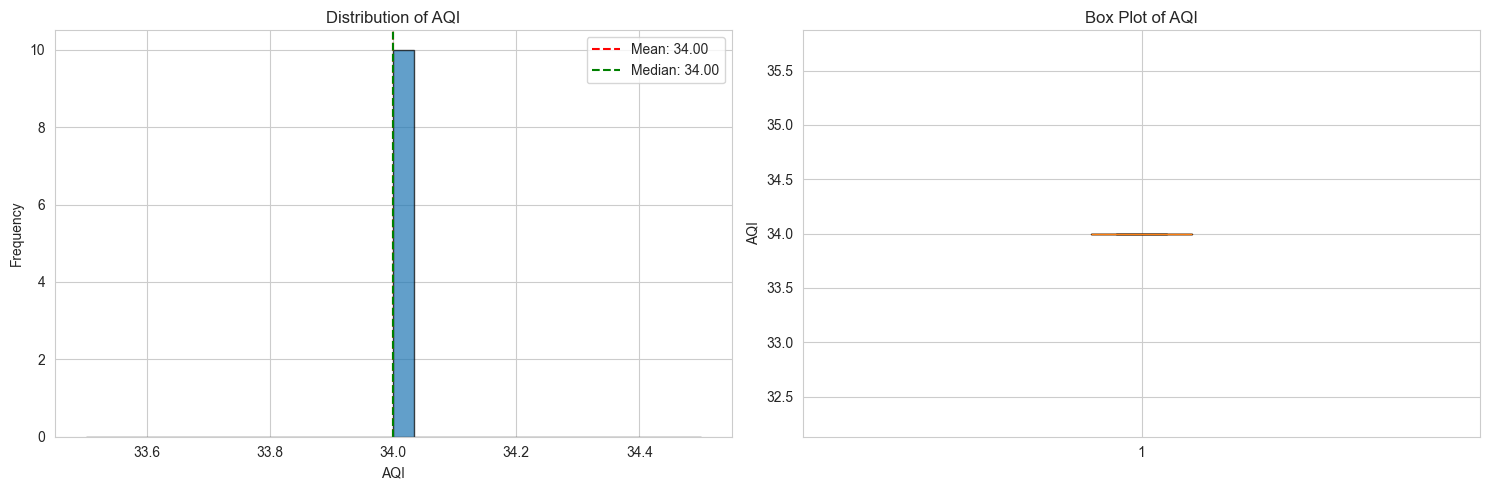

AQI Statistics:
Mean: 34.00
Median: 34.00
Std: 0.00
Min: 34.00
Max: 34.00


In [9]:
# Distribution of AQI
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['aqi'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of AQI')
axes[0].set_xlabel('AQI')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['aqi'].mean(), color='red', linestyle='--', label=f'Mean: {df["aqi"].mean():.2f}')
axes[0].axvline(df['aqi'].median(), color='green', linestyle='--', label=f'Median: {df["aqi"].median():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['aqi'], vert=True)
axes[1].set_title('Box Plot of AQI')
axes[1].set_ylabel('AQI')

plt.tight_layout()
plt.show()

print(f"AQI Statistics:")
print(f"Mean: {df['aqi'].mean():.2f}")
print(f"Median: {df['aqi'].median():.2f}")
print(f"Std: {df['aqi'].std():.2f}")
print(f"Min: {df['aqi'].min():.2f}")
print(f"Max: {df['aqi'].max():.2f}")

## 4. Feature Distributions

In [10]:
# Select numeric features for analysis
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove event_id if it's numeric but not a feature
if 'event_id' in numeric_features:
    numeric_features.remove('event_id')

print(f"Numeric features: {numeric_features}")

Numeric features: ['aqi', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'hour', 'day', 'month']


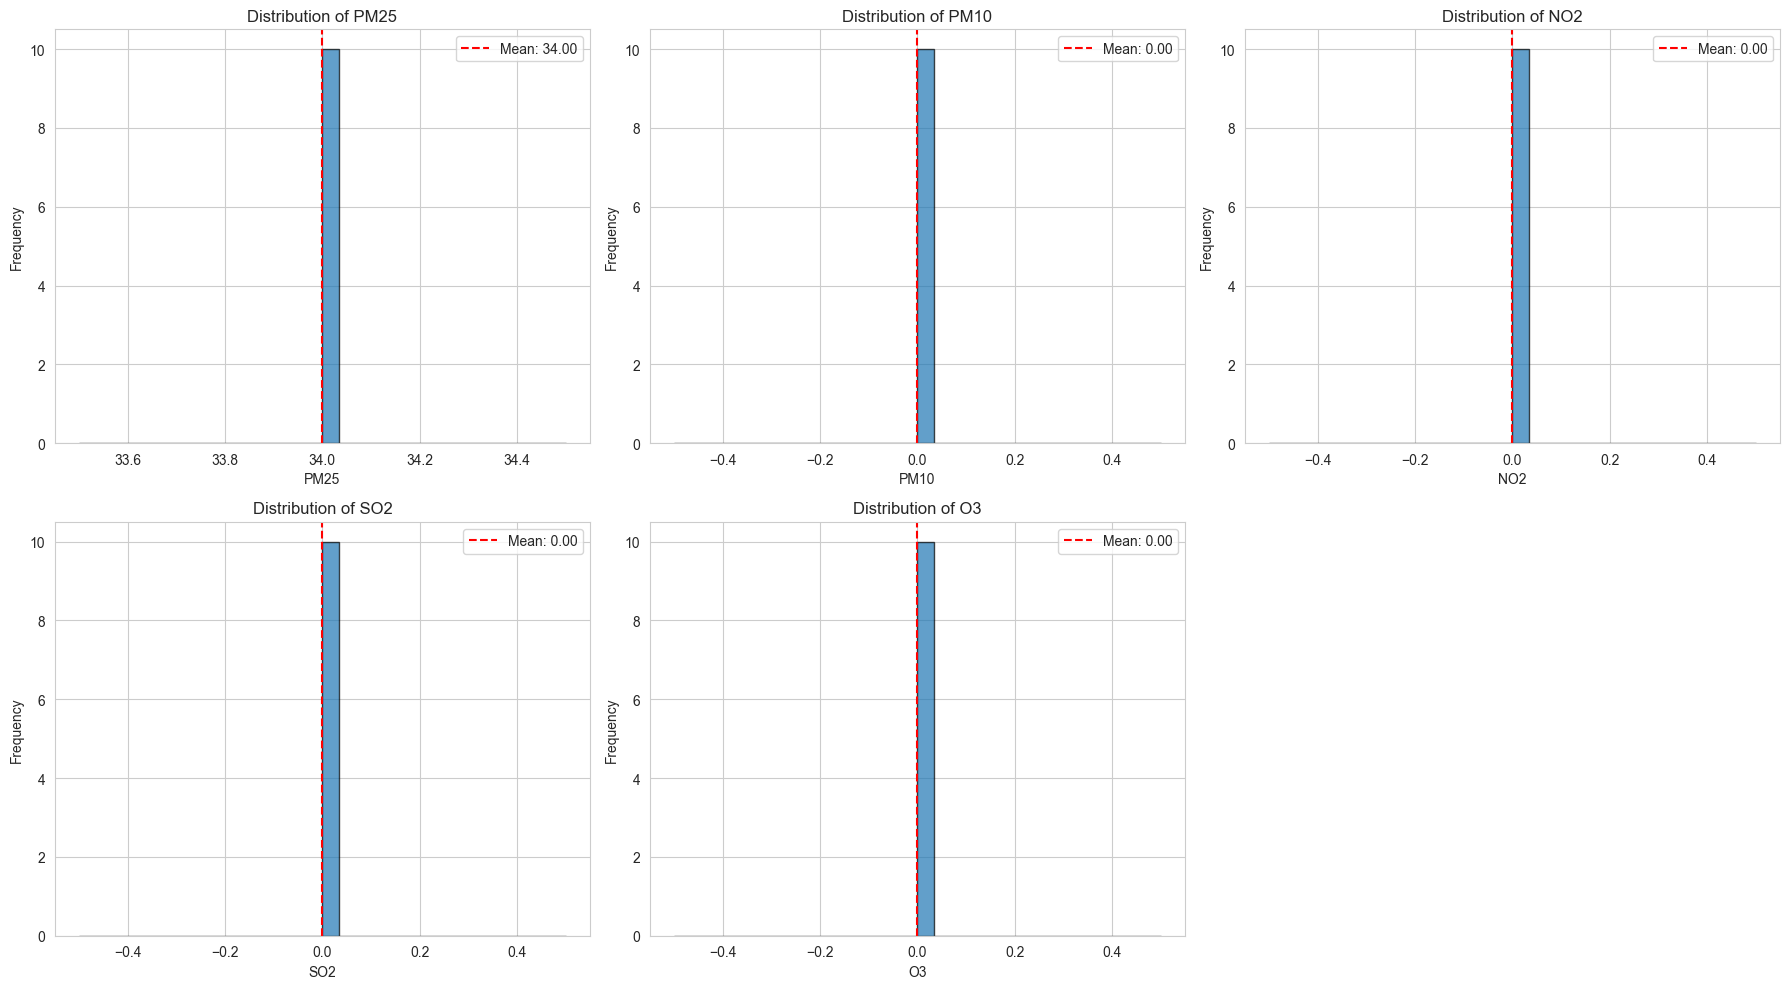

In [11]:
# Distribution of pollutant features
pollutants = ['pm25', 'pm10', 'no2', 'so2', 'o3']
pollutants = [p for p in pollutants if p in df.columns]

if len(pollutants) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for i, pollutant in enumerate(pollutants):
        axes[i].hist(df[pollutant], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribution of {pollutant.upper()}')
        axes[i].set_xlabel(pollutant.upper())
        axes[i].set_ylabel('Frequency')
        axes[i].axvline(df[pollutant].mean(), color='red', linestyle='--', 
                       label=f'Mean: {df[pollutant].mean():.2f}')
        axes[i].legend()
    
    # Hide extra subplots
    for i in range(len(pollutants), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

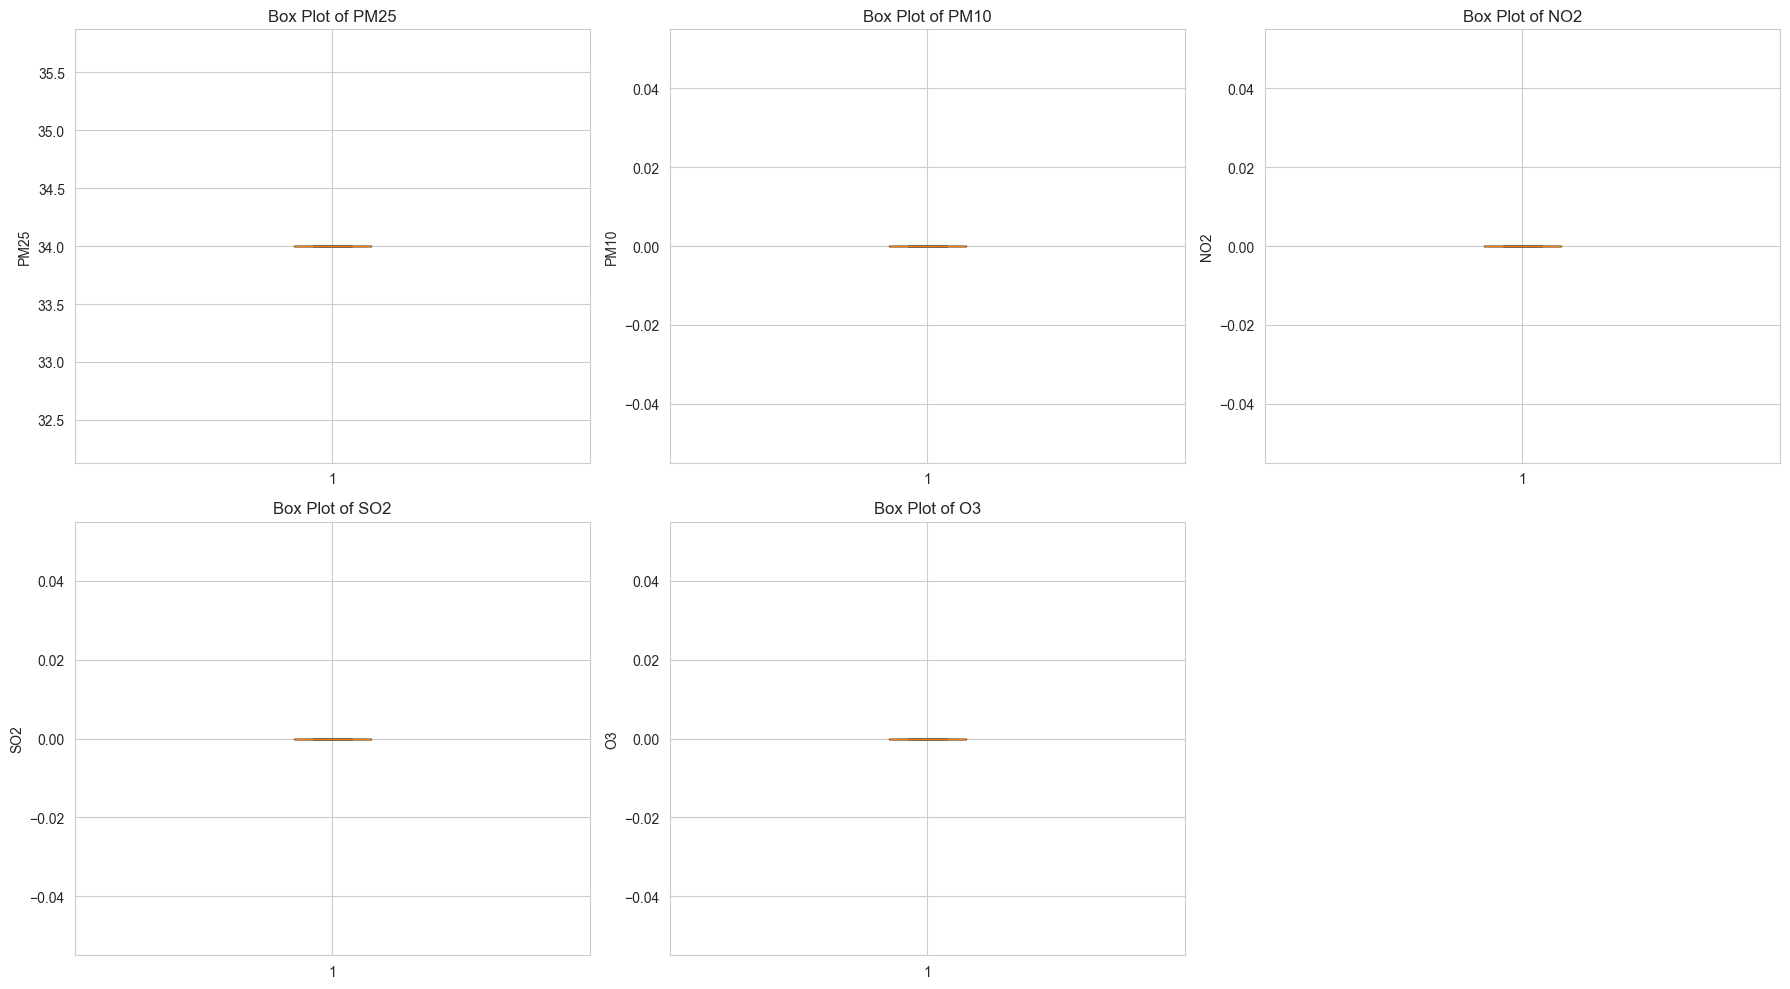

In [12]:
# Box plots for pollutants
if len(pollutants) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for i, pollutant in enumerate(pollutants):
        axes[i].boxplot(df[pollutant], vert=True)
        axes[i].set_title(f'Box Plot of {pollutant.upper()}')
        axes[i].set_ylabel(pollutant.upper())
    
    # Hide extra subplots
    for i in range(len(pollutants), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

## 5. Correlation Analysis

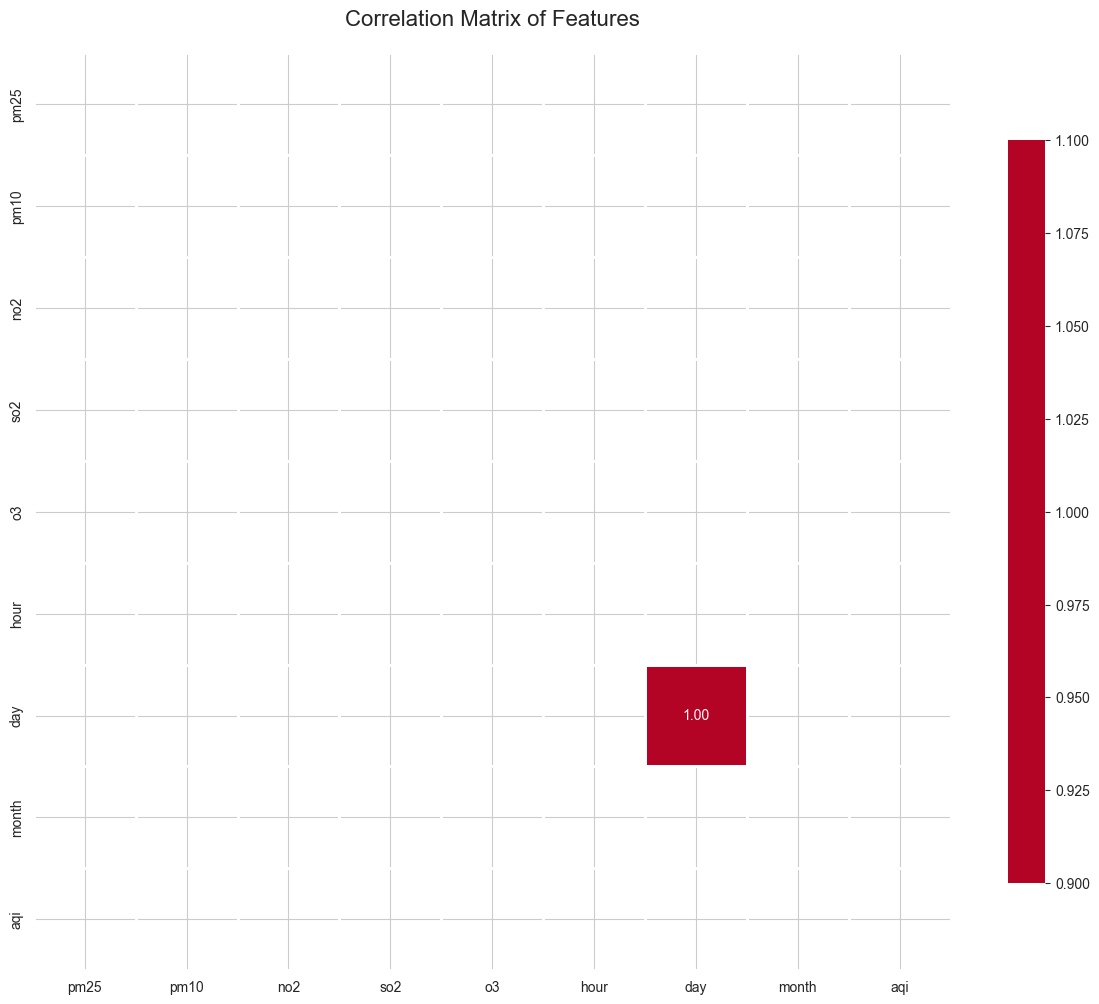

In [13]:
# Calculate correlation matrix for numeric features
correlation_features = numeric_features.copy()
if 'aqi' in correlation_features:
    correlation_features.remove('aqi')
correlation_features.append('aqi')

corr_matrix = df[correlation_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

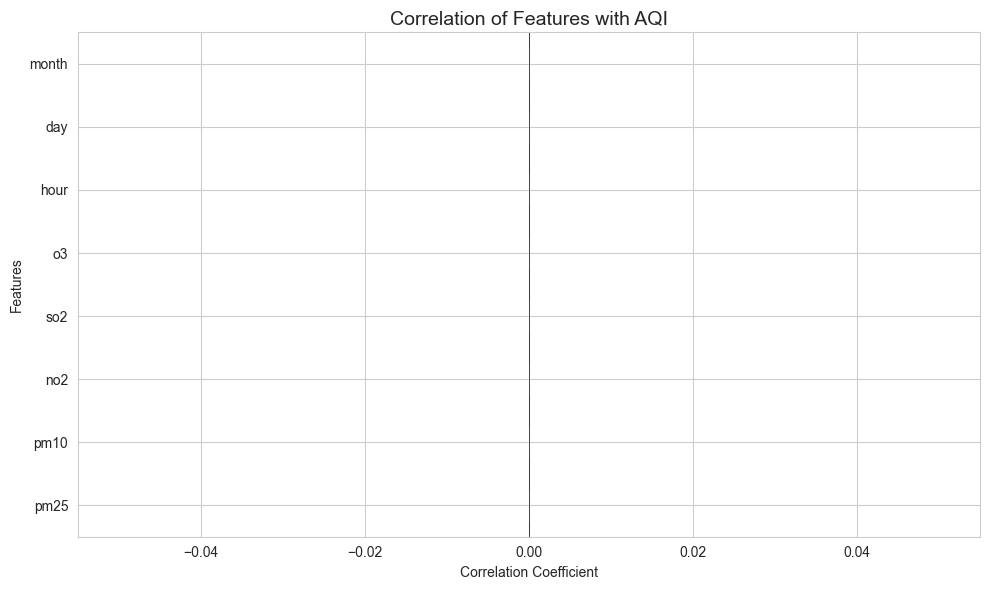


Correlation with AQI:
pm25    NaN
pm10    NaN
no2     NaN
so2     NaN
o3      NaN
hour    NaN
day     NaN
month   NaN
Name: aqi, dtype: float64


In [14]:
# Correlation with target variable (AQI)
if 'aqi' in df.columns:
    correlations = df[numeric_features].corr()['aqi'].sort_values(ascending=False)
    correlations = correlations[correlations.index != 'aqi']
    
    plt.figure(figsize=(10, 6))
    correlations.plot(kind='barh', color='steelblue')
    plt.title('Correlation of Features with AQI', fontsize=14)
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Features')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    print("\nCorrelation with AQI:")
    print(correlations)

## 6. Time Series Analysis

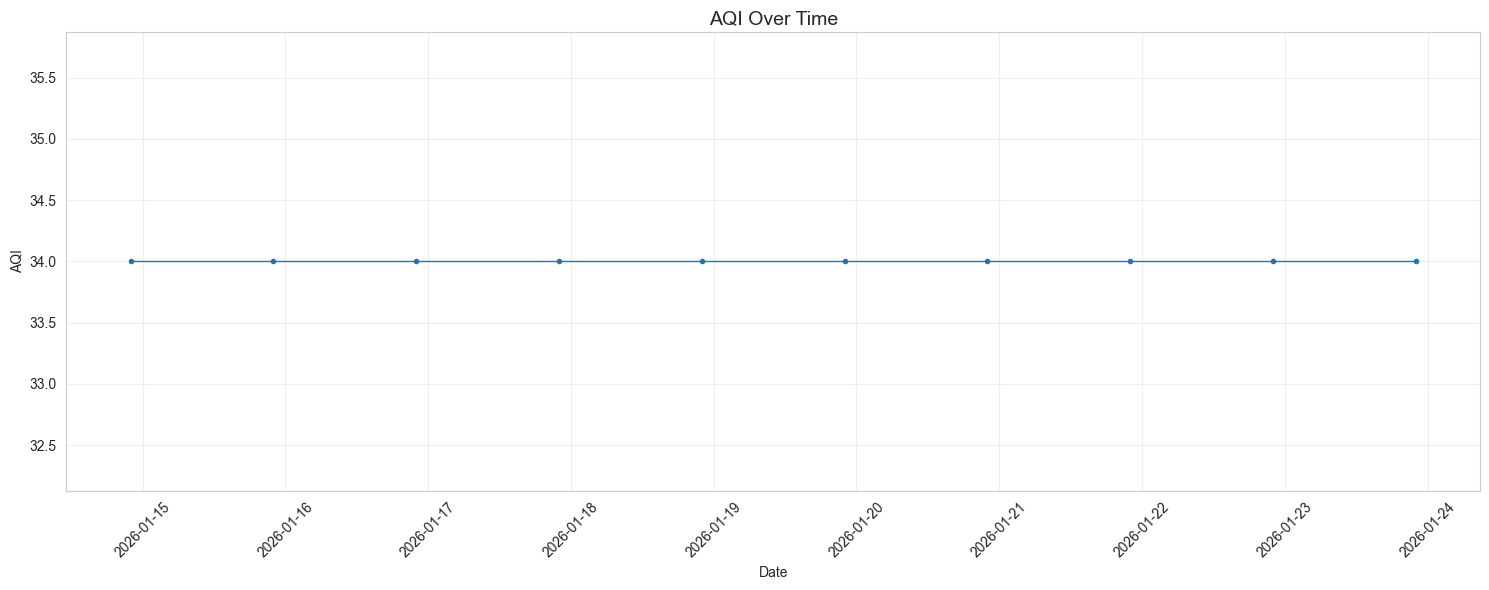

In [15]:
# Convert timestamp to datetime if it's not already
if 'timestamp' in df.columns:
    if df['timestamp'].dtype == 'object' or 'datetime' in str(df['timestamp'].dtype):
        df['datetime'] = pd.to_datetime(df['timestamp'])
    else:
        # Assume it's in milliseconds
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    # Sort by datetime
    df_sorted = df.sort_values('datetime')
    
    # Plot AQI over time
    plt.figure(figsize=(15, 6))
    plt.plot(df_sorted['datetime'], df_sorted['aqi'], marker='o', markersize=3, linewidth=1)
    plt.title('AQI Over Time', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

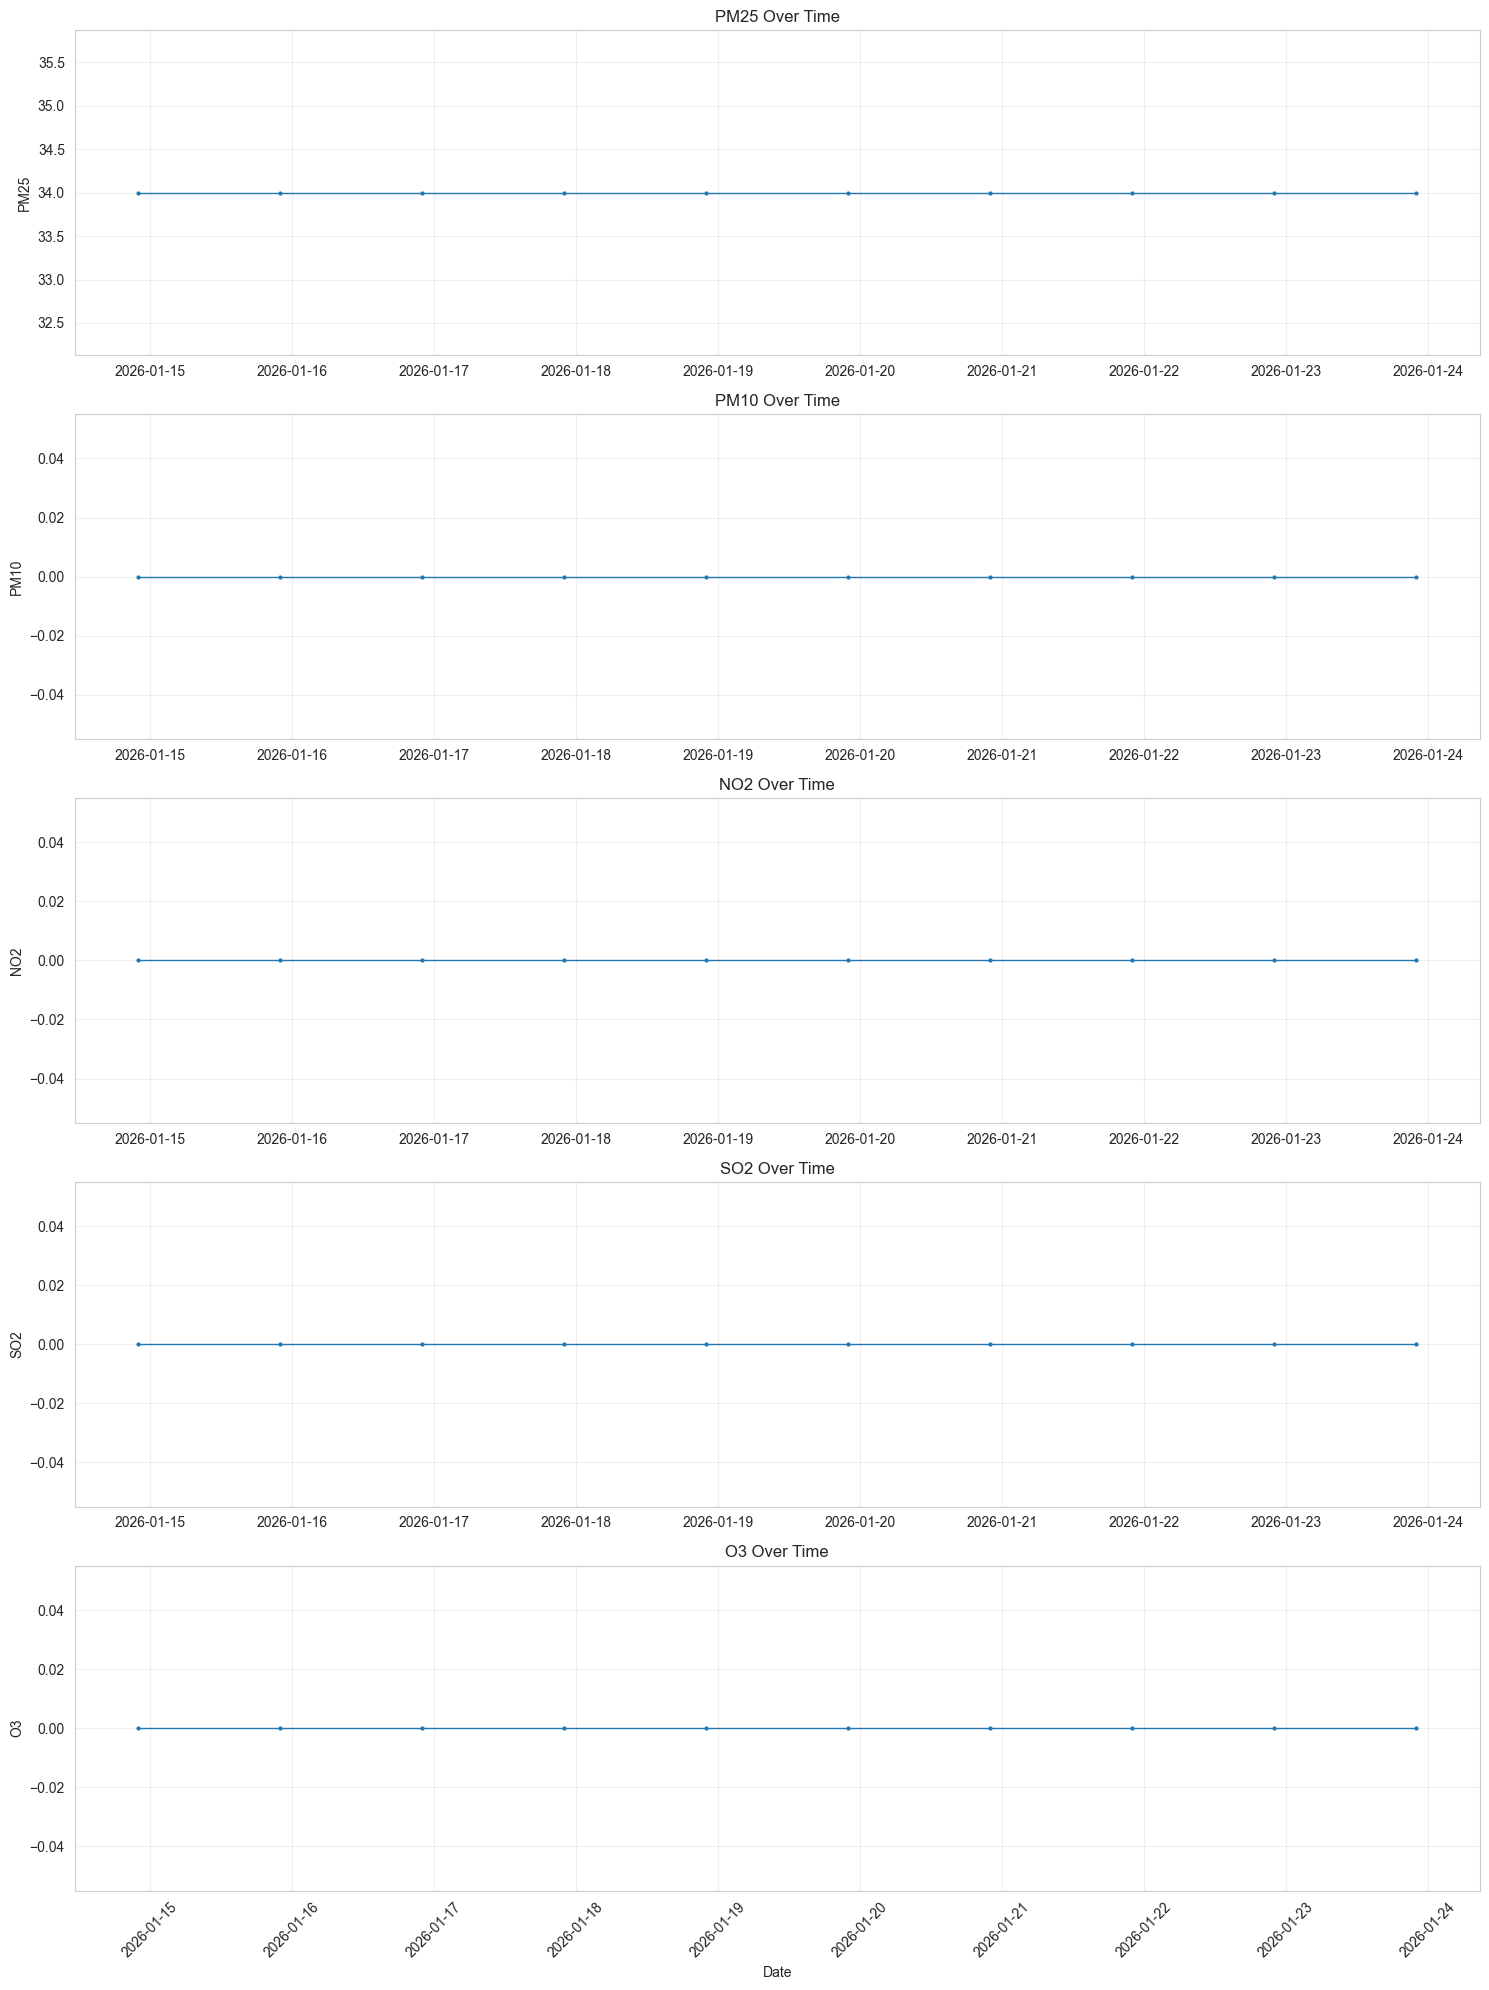

In [16]:
# Plot pollutants over time
if 'datetime' in df.columns and len(pollutants) > 0:
    fig, axes = plt.subplots(len(pollutants), 1, figsize=(15, 4*len(pollutants)))
    if len(pollutants) == 1:
        axes = [axes]
    
    for i, pollutant in enumerate(pollutants):
        axes[i].plot(df_sorted['datetime'], df_sorted[pollutant], marker='o', markersize=2, linewidth=1)
        axes[i].set_title(f'{pollutant.upper()} Over Time', fontsize=12)
        axes[i].set_ylabel(pollutant.upper())
        axes[i].grid(True, alpha=0.3)
    
    axes[-1].set_xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 7. Feature Relationships with Target

SystemError: <class 'numpy.linalg.LinAlgError'> returned a result with an exception set

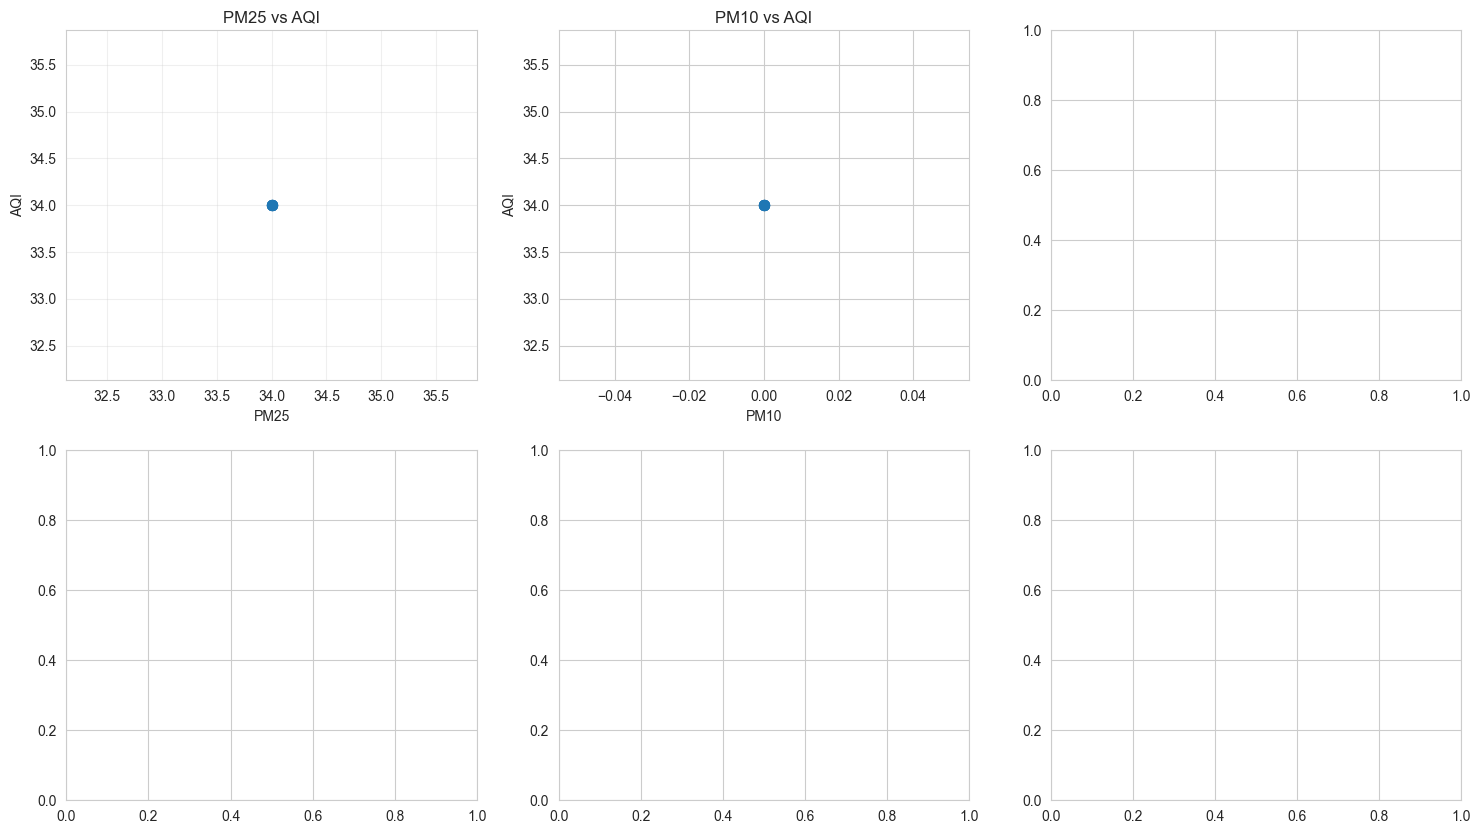

In [17]:
# Scatter plots of features vs AQI
if len(pollutants) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for i, pollutant in enumerate(pollutants):
        axes[i].scatter(df[pollutant], df['aqi'], alpha=0.6, s=50)
        axes[i].set_xlabel(pollutant.upper())
        axes[i].set_ylabel('AQI')
        axes[i].set_title(f'{pollutant.upper()} vs AQI')
        
        # Add trend line
        z = np.polyfit(df[pollutant], df['aqi'], 1)
        p = np.poly1d(z)
        axes[i].plot(df[pollutant], p(df[pollutant]), "r--", alpha=0.8, linewidth=2)
        axes[i].grid(True, alpha=0.3)
    
    # Hide extra subplots
    for i in range(len(pollutants), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

## 8. Temporal Features Analysis

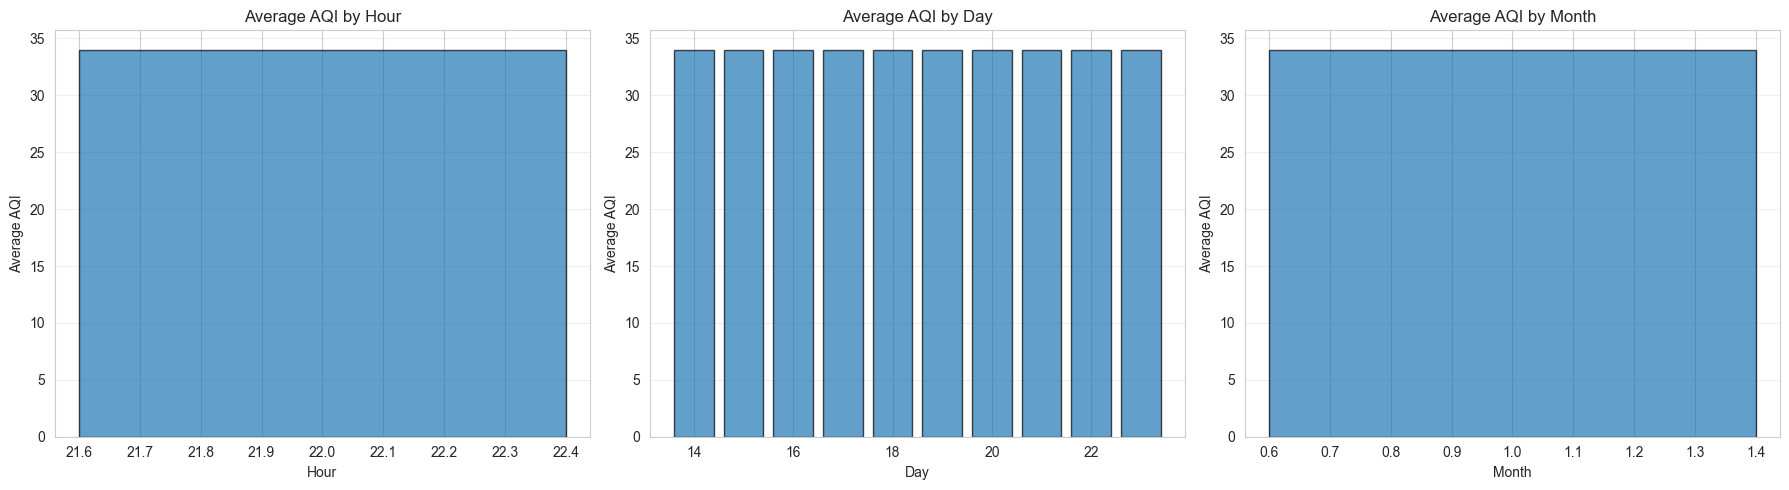

In [18]:
# Analyze AQI by hour, day, month if available
temporal_features = ['hour', 'day', 'month']
available_temporal = [f for f in temporal_features if f in df.columns]

if len(available_temporal) > 0:
    fig, axes = plt.subplots(1, len(available_temporal), figsize=(6*len(available_temporal), 5))
    if len(available_temporal) == 1:
        axes = [axes]
    
    for i, feature in enumerate(available_temporal):
        avg_aqi = df.groupby(feature)['aqi'].mean()
        axes[i].bar(avg_aqi.index, avg_aqi.values, alpha=0.7, edgecolor='black')
        axes[i].set_xlabel(feature.capitalize())
        axes[i].set_ylabel('Average AQI')
        axes[i].set_title(f'Average AQI by {feature.capitalize()}')
        axes[i].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

## 9. Outlier Detection

In [19]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in AQI and pollutants
features_to_check = ['aqi'] + pollutants
features_to_check = [f for f in features_to_check if f in df.columns]

print("Outlier Detection (IQR Method):")
print("=" * 60)
for feature in features_to_check:
    outliers, lower, upper = detect_outliers_iqr(df, feature)
    print(f"\n{feature.upper()}:")
    print(f"  Lower bound: {lower:.2f}")
    print(f"  Upper bound: {upper:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

Outlier Detection (IQR Method):

AQI:
  Lower bound: 34.00
  Upper bound: 34.00
  Number of outliers: 0 (0.00%)

PM25:
  Lower bound: 34.00
  Upper bound: 34.00
  Number of outliers: 0 (0.00%)

PM10:
  Lower bound: 0.00
  Upper bound: 0.00
  Number of outliers: 0 (0.00%)

NO2:
  Lower bound: 0.00
  Upper bound: 0.00
  Number of outliers: 0 (0.00%)

SO2:
  Lower bound: 0.00
  Upper bound: 0.00
  Number of outliers: 0 (0.00%)

O3:
  Lower bound: 0.00
  Upper bound: 0.00
  Number of outliers: 0 (0.00%)


## 10. Summary and Insights

In [20]:
print("=" * 60)
print("EDA SUMMARY")
print("=" * 60)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Features: {len(df.columns)}")
print(f"Number of Records: {len(df)}")
print(f"\nMissing Values: {df.isnull().sum().sum()}")
print(f"\nNumeric Features: {len(numeric_features)}")
print(f"\nTarget Variable (AQI) Statistics:")
print(f"  Mean: {df['aqi'].mean():.2f}")
print(f"  Median: {df['aqi'].median():.2f}")
print(f"  Std: {df['aqi'].std():.2f}")
print(f"  Range: {df['aqi'].min():.2f} - {df['aqi'].max():.2f}")

if 'aqi' in df.columns:
    correlations = df[numeric_features].corr()['aqi'].sort_values(ascending=False)
    correlations = correlations[correlations.index != 'aqi']
    print(f"\nTop 3 Features Correlated with AQI:")
    for i, (feature, corr) in enumerate(correlations.head(3).items(), 1):
        print(f"  {i}. {feature}: {corr:.3f}")

EDA SUMMARY

Dataset Shape: (10, 13)
Number of Features: 13
Number of Records: 10

Missing Values: 0

Numeric Features: 9

Target Variable (AQI) Statistics:
  Mean: 34.00
  Median: 34.00
  Std: 0.00
  Range: 34.00 - 34.00

Top 3 Features Correlated with AQI:
  1. pm25: nan
  2. pm10: nan
  3. no2: nan
